In [54]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
data_path = "https://raw.githubusercontent.com/Mechademy-Git/DS-Intern-Assignment/main/data/data.csv"
df = pd.read_csv(data_path)

In [57]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [60]:
#Checking the Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [62]:
df.isnull().sum().sort_values(ascending=False).head(10)

zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
equipment_energy_consumption    844
atmospheric_pressure            842
dtype: int64

In [64]:
#Summary Statistics
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


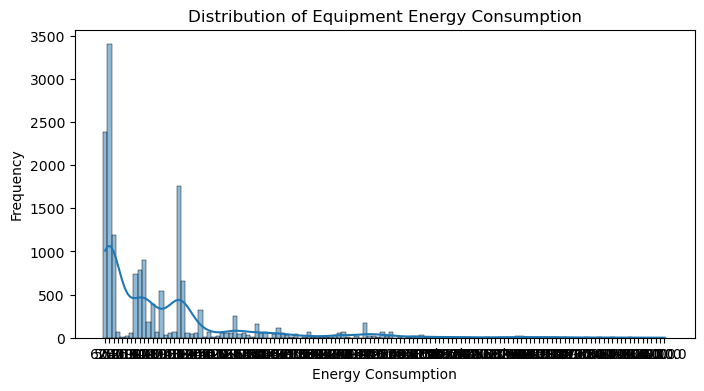

In [66]:
plt.figure(figsize=(8, 4))
sns.histplot(df['equipment_energy_consumption'], kde=True)
plt.title("Distribution of Equipment Energy Consumption")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


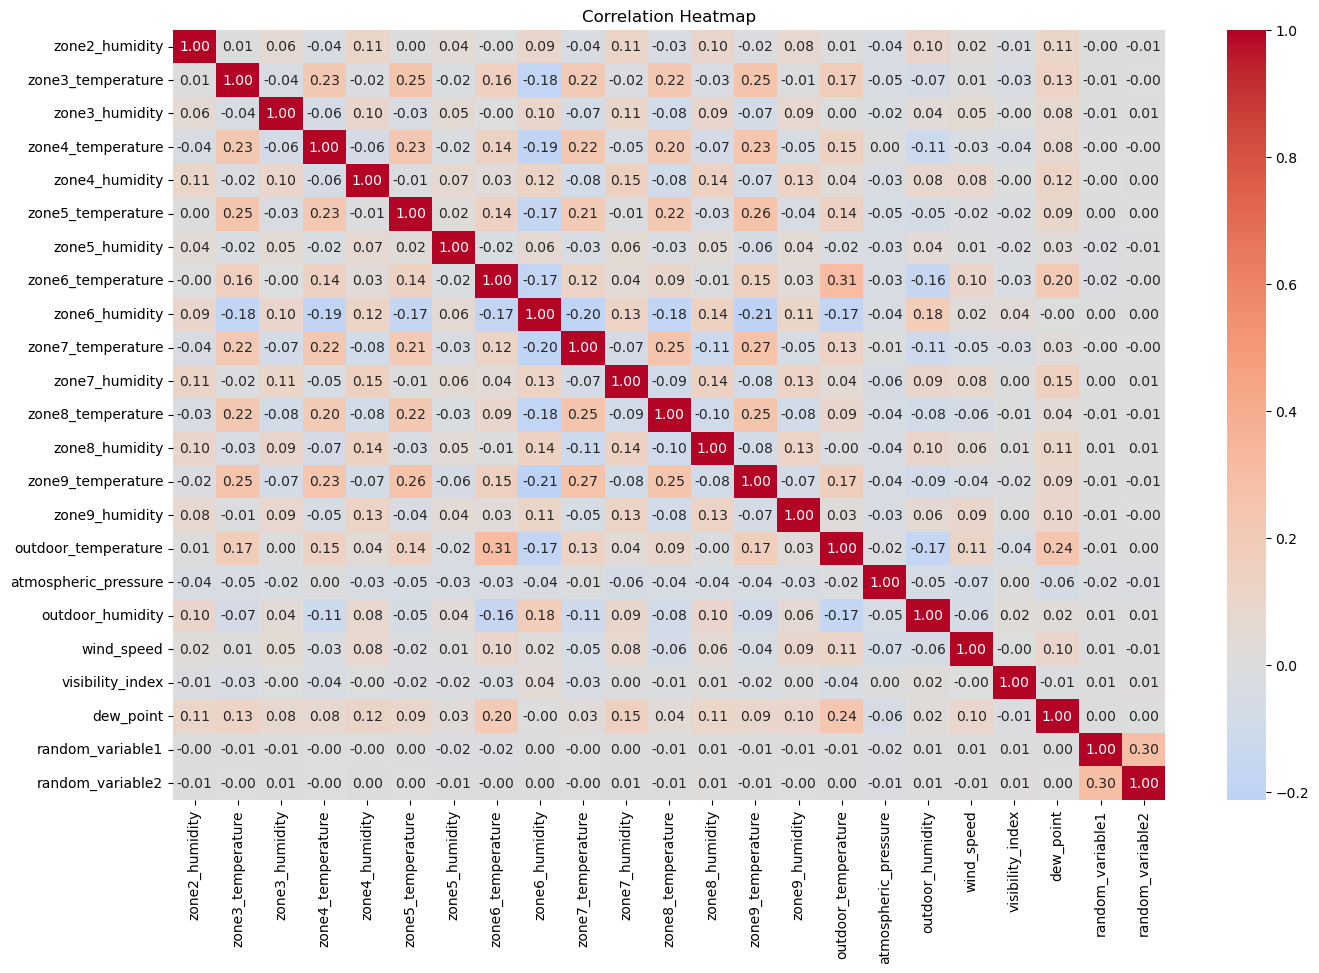

In [68]:
plt.figure(figsize=(16, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f") 
plt.title('Correlation Heatmap')
plt.show()


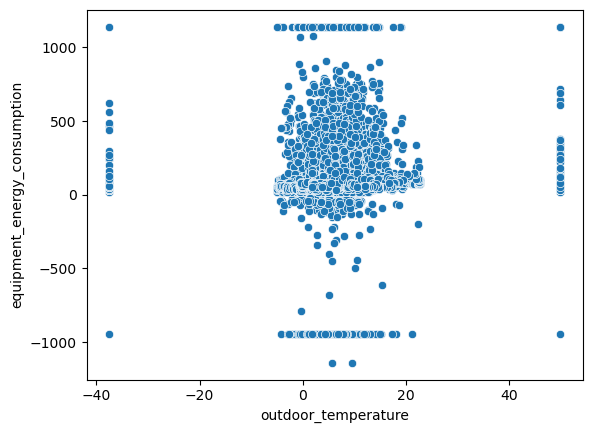

In [70]:
# Clean the data
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df = df.dropna(subset=['equipment_energy_consumption', 'outdoor_temperature'])

# Plot
sns.scatterplot(x='outdoor_temperature', y='equipment_energy_consumption', data=df)
plt.show()


In [72]:
#Handle Missing Values

df.isnull().sum().sort_values(ascending=False)

zone9_humidity                  796
zone2_humidity                  792
zone3_humidity                  785
zone1_temperature               772
zone2_temperature               772
zone6_humidity                  761
zone8_temperature               761
zone5_temperature               757
atmospheric_pressure            755
random_variable1                754
zone6_temperature               753
wind_speed                      750
random_variable2                742
zone7_humidity                  737
zone4_temperature               737
visibility_index                733
dew_point                       733
zone1_humidity                  724
outdoor_humidity                722
zone3_temperature               718
lighting_energy                 709
zone7_temperature               708
zone8_humidity                  706
zone5_humidity                  701
zone4_humidity                  697
zone9_temperature               692
equipment_energy_consumption      0
outdoor_temperature         

In [74]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [76]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                 709
zone1_temperature               772
zone1_humidity                  724
zone2_temperature               772
zone2_humidity                    0
zone3_temperature                 0
zone3_humidity                    0
zone4_temperature                 0
zone4_humidity                    0
zone5_temperature                 0
zone5_humidity                    0
zone6_temperature                 0
zone6_humidity                    0
zone7_temperature                 0
zone7_humidity                    0
zone8_temperature                 0
zone8_humidity                    0
zone9_temperature                 0
zone9_humidity                    0
outdoor_temperature               0
atmospheric_pressure              0
outdoor_humidity                  0
wind_speed                        0
visibility_index                  0
dew_point                         0
random_variable1            

In [78]:
#Check for Duplicates
df.duplicated().sum()

61

In [80]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [82]:
# Convert the columns to numeric, forcing errors to NaN
cols_to_impute = ['lighting_energy', 'zone1_temperature', 'zone1_humidity','zone2_temperature']

for col in cols_to_impute:
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col].fillna(df[col].median(), inplace=True)     

In [84]:
df[cols_to_impute].isnull().sum()

lighting_energy      0
zone1_temperature    0
zone1_humidity       0
zone2_temperature    0
dtype: int64

In [86]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

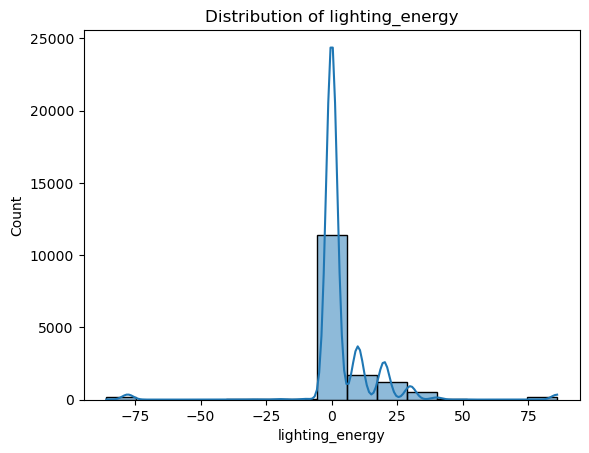

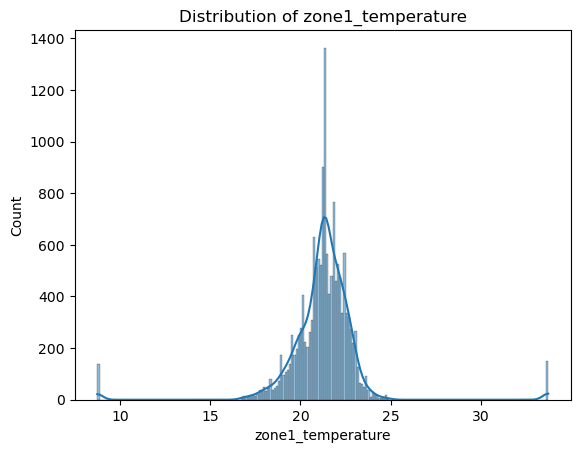

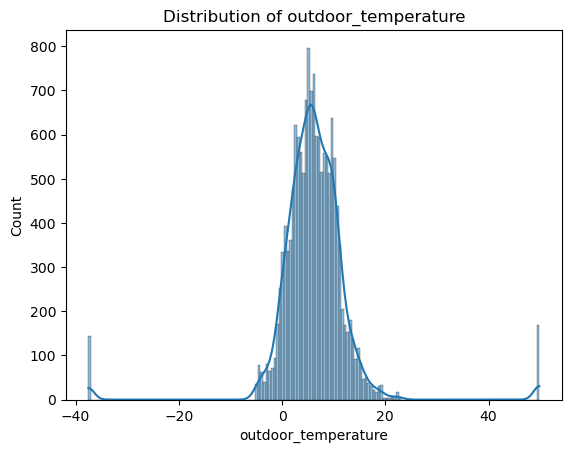

In [88]:
for col in ['lighting_energy', 'zone1_temperature', 'outdoor_temperature']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


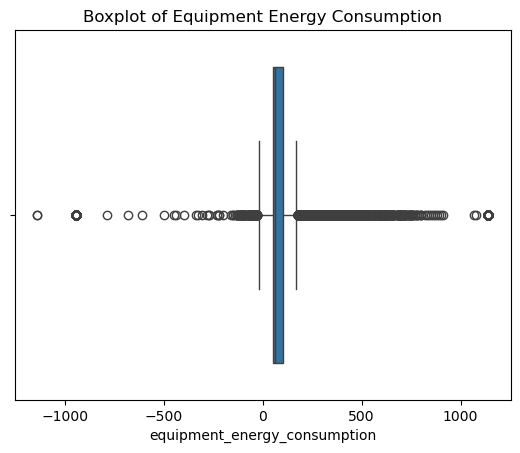

In [90]:
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title("Boxplot of Equipment Energy Consumption")
plt.show()


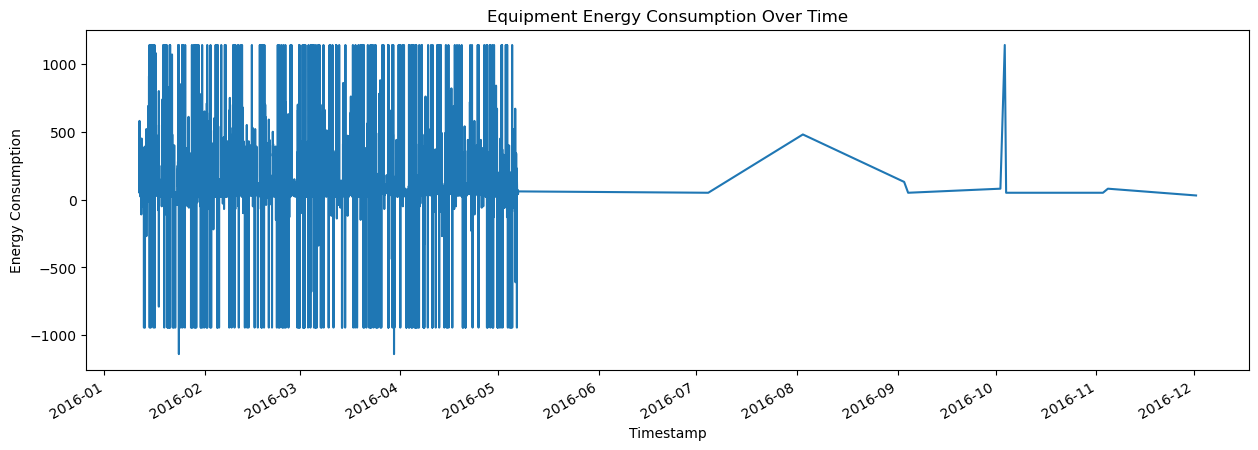

In [92]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp')['equipment_energy_consumption'].plot(figsize=(15,5))
plt.title("Equipment Energy Consumption Over Time")
plt.ylabel("Energy Consumption")
plt.xlabel("Timestamp")
plt.show()


In [94]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year


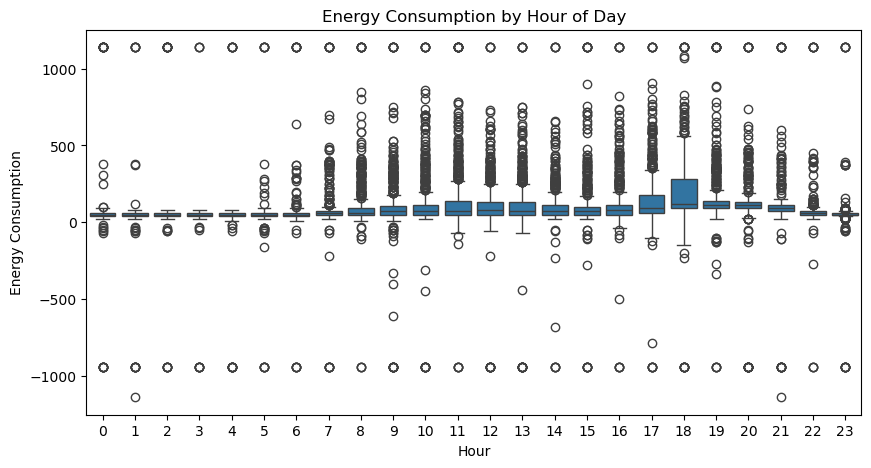

In [96]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title('Energy Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.show()


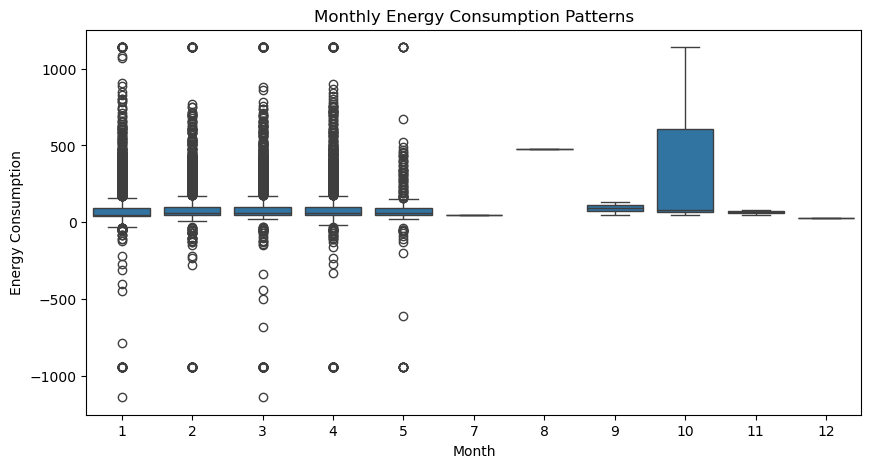

In [98]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='equipment_energy_consumption', data=df)
plt.title('Monthly Energy Consumption Patterns')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.show()


In [100]:
# Feature Selection
df = df.drop(columns=['timestamp'])

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

In [104]:

# Split into features and target

X = df.drop(columns=[col for col in ['equipment_energy_consumption', 'timestamp'] if col in df.columns])
y = df['equipment_energy_consumption']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [108]:

# Models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xg = xgb.XGBRegressor(random_state=42)


In [ ]:
# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xg.fit(X_train, y_train)

# Predict
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xg_pred = xg.predict(X_test)

In [ ]:
# Evaluation function
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

# Evaluate each
evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xg_pred)
